# EDA on Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the dataset using pandas predefined function read_csv
df= pd.read_csv("E://Technical//DS_AI_ML//ineuron_internship//eda&feature_engineering_learning//titanic_dataset_eda//eda_by_krish//titanic_train.csv")

In [3]:
# Displaying the top 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking out the shape of the dataset
df.shape

(891, 12)

In [5]:
# collecting information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis
let's begin with the exploratory data analysis

In [6]:
# Checking the null values in the dataset, this looks messy so we will count the actual number of the null values 
# in the next step
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# checking out the null or missing values first
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

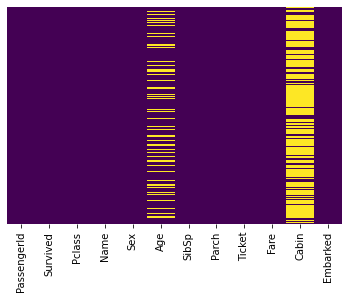

In [8]:
# plotting the null values using heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

We can see here most of the null values are in feature age and cabin

<AxesSubplot: xlabel='Survived', ylabel='count'>

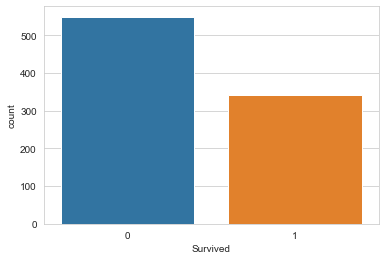

In [9]:
#checking how many people survived
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=df)

<AxesSubplot: xlabel='Survived', ylabel='count'>

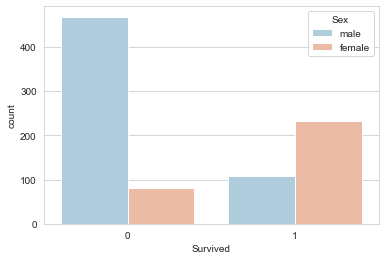

In [10]:
# checking survived w.r.t male or female which shows maximum number of males lost their lives
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Sex", data=df, palette="RdBu_r")

In [11]:
# unique values in passenger class
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

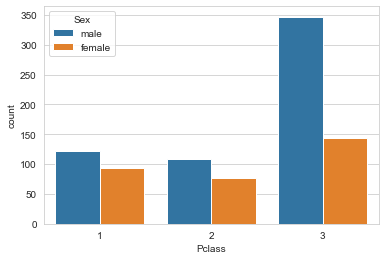

In [12]:
# checking gender w.r.t the Pclass
sns.set_style("whitegrid")
sns.countplot(x="Pclass", hue="Sex", data=df)

<AxesSubplot: xlabel='Survived', ylabel='count'>

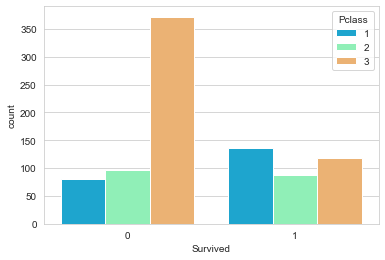

In [13]:
#checking how many people survived w.r.t the Pclass, maximum number people who was in Pclass=3 died
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Pclass", data=df, palette="rainbow")

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Age'>

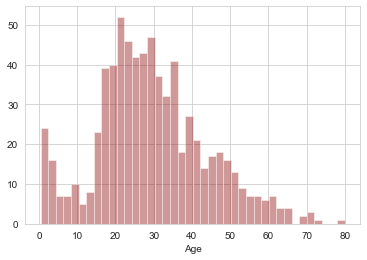

In [14]:
sns.distplot(df["Age"].dropna(), kde= False, color= "darkred", bins=40)

<AxesSubplot: >

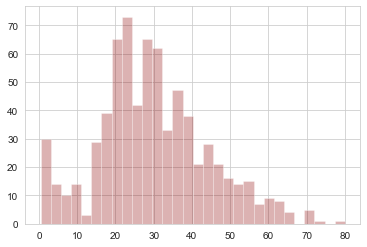

In [15]:
df["Age"].hist(bins=30, color="darkred", alpha=0.3)

In [16]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

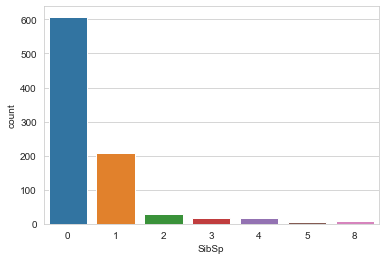

In [17]:
sns.countplot(x="SibSp", data=df)

In [18]:
df["Fare"].count()

891

In [19]:
count=0
for i in df["Fare"]:
    if i==df["Fare"].max():
        count+=1
count

3

<AxesSubplot: >

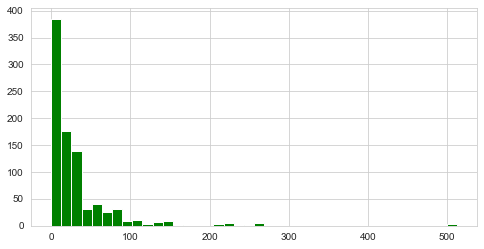

In [20]:
df["Fare"].hist(bins=40, color="green", figsize=(8,4))

# Using cufflinks for plotting histogram
Cufflinks is a python library that connects plotly with pandas so that we can create charts directly on data frames.

In [21]:
import cufflinks as cf
cf.go_offline()

In [22]:
df["Fare"].iplot(kind="hist",bins=30, color="green")

# Data Cleaning

<AxesSubplot: xlabel='Age'>

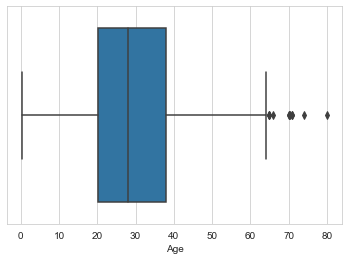

In [23]:
sns.boxplot(x="Age", data=df)

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

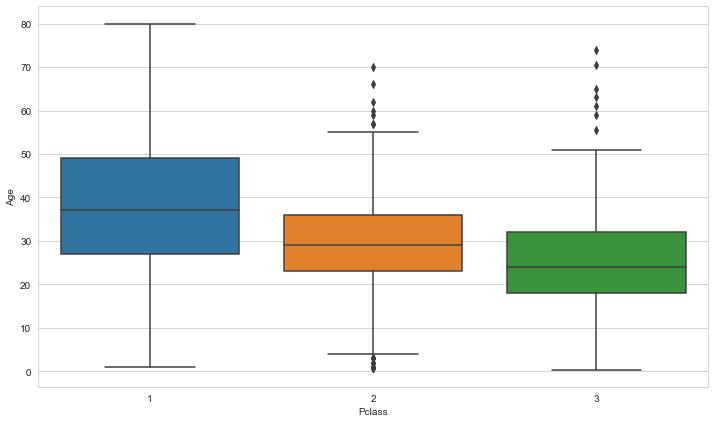

In [24]:
# Removing the null values of age feature w.r.t mean of Age of Pclass  
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass", y="Age", data=df)

In [25]:
def handle_null(cols):
    Age= cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [26]:
df["Age"]= df[["Age","Pclass"]].apply(handle_null,axis=1)

<AxesSubplot: >

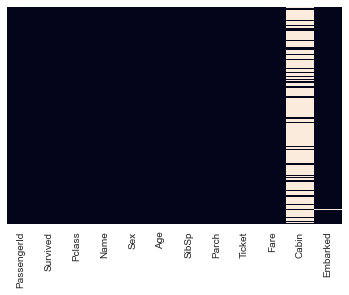

In [27]:
# we have removed the null values of age column
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Dropping the cabin column will be an effective idea because we have maximum number of missing values in it.

In [28]:
df.drop("Cabin", axis=1, inplace=True)

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot: >

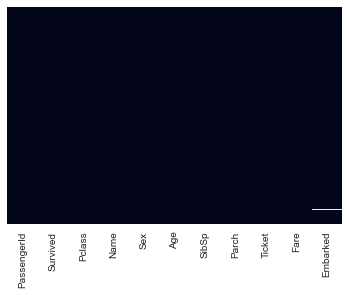

In [30]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [31]:
df.dropna(inplace=True)

<AxesSubplot: >

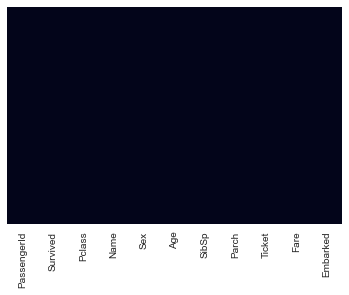

In [32]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# Encode the categorical features
We have to convert the categorical variables or else we will not be able to pass that to machine learning algorithms as the input data, so I am converting the categorical variables to the dummy variables using pandas.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [34]:
pd.get_dummies(df["Embarked"])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [35]:
# pd.get_dummies will be applied on both sex and embarked columns

pd.get_dummies(df["Embarked"],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [36]:
sex= pd.get_dummies(df["Sex"], drop_first=True)
embark= pd.get_dummies(df["Embarked"], drop_first=True)

In [37]:
df.drop(["Sex","Embarked","Name","Ticket"], axis=1, inplace=True)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [39]:
df= pd.concat([df,sex,embark],axis=1)

In [40]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Our data is ready for model

# Building a logistic regression model
I will start witth splitting the data into training set and testing set

In [41]:
df.drop("Survived", axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [42]:
df["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# the dataset except survived feature will all be the value of x where as suvived feature will be the value of y
# and the test size would be 30% of the data

X_train, X_test, y_train, y_test= train_test_split(df.drop("Survived", axis=1),
                                                  df["Survived"], test_size=0.30,
                                                  random_state=101)

# Training and Predicting

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [47]:
predictions = logmodel.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
accuracy=confusion_matrix(y_test,predictions)

In [50]:
accuracy

array([[152,  11],
       [ 40,  64]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
# got 80% accuracy
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8089887640449438

In [53]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

We will evaluate the model now
# Evaluation
I will check the precision, recall, f1-score using classification report.

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       163
           1       0.85      0.62      0.72       104

    accuracy                           0.81       267
   macro avg       0.82      0.77      0.79       267
weighted avg       0.82      0.81      0.80       267

